## 📌 01. 분류 개념 알아보기
### 💡 분류?
- 주어진 입력 값이 **어떤 클래스에 속할지**에 대한 결과 값을 도출하는 알고리즘
- 다양한 분류 알고리즘이 존재하며, 예측 목표와 데이터 유형에 따라 적용

### 💡 분류 알고리즘 종류
분류 문제에 다양한 머신러닝 모델을 사용하여 해결
- 트리 구조 기반: 의사결정나무, 랜덤포레스트, ...
- 확률 모델 기반: 나이브 베이즈 분류기, ...
- 결정 경계 기반: 선형 분류기, 로지스틱 회귀 분류기, SVM, ...
- 신경망: 퍼셉트론, 딥러닝 모델, ...
- ...

## 📌 02. 의사결정나무 - 모델 구조

### 💡 의사결정나무(Decision Tree)
- 스무고개와 같이 특정 질문들을 통해 정답을 찾아가는 모델
- 최상단의 뿌리 마디에서 마지막 끝 마디까지 아래 방향으로 진행
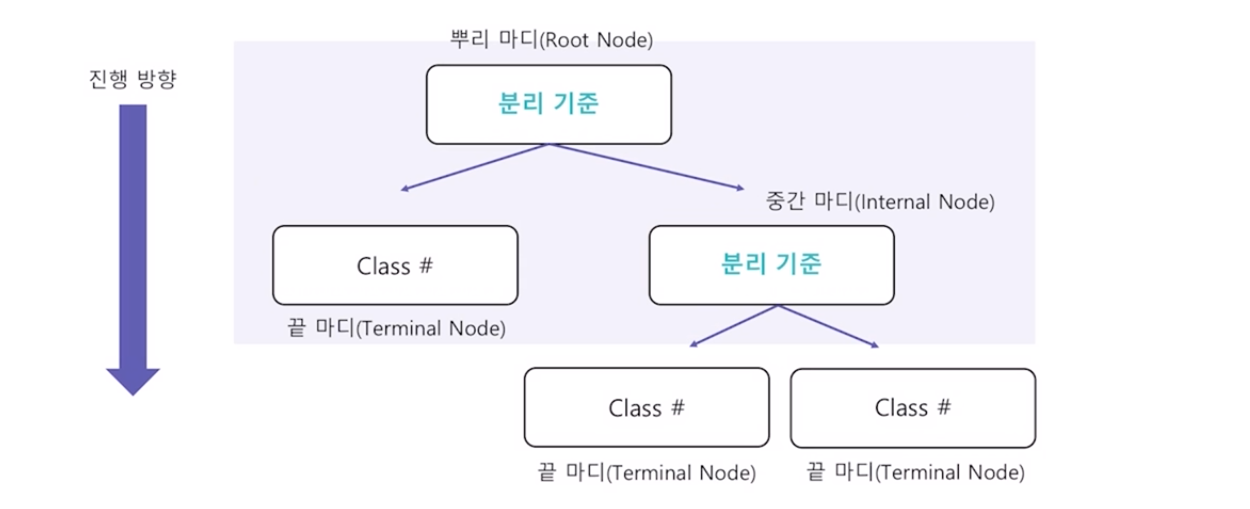


### 👩‍💻 예제1

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# sklearn에 저장된 데이터를 불러 옵니다.
X, Y = load_iris(return_X_y = True)

# DataFrame으로 변환 (sepal: 꽃받침, petal: 꽃잎)
df = pd.DataFrame(X, columns=['sepal length','sepal width', 'petal length', 'petal width'])
df['class'] = Y

X = df.drop(columns=['class'])
Y = df['class']

"""
1. 학습용 평가용 데이터로 분리합니다
"""
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# 원본 데이터 출력
print('원본 데이터 : \n',df.head(),'\n')

# 전 처리한 데이터 5개만 출력합니다
print('train_X : ')
print(train_X[:5],'\n')
print('train_Y : ')
print(train_Y[:5],'\n')

print('test_X : ')
print(test_X[:5],'\n')
print('test_Y : ')
print(test_Y[:5])

원본 데이터 : 
    sepal length  sepal width  petal length  petal width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0 

train_X : 
    sepal length  sepal width  petal length  petal width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2 

train_Y : 
22    0
15    0
65    1
11    0
42    0
Name: class, dtype: int32 

test_X : 
     sepal length  sepal width  petal length  petal width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7     

#### 학습하기

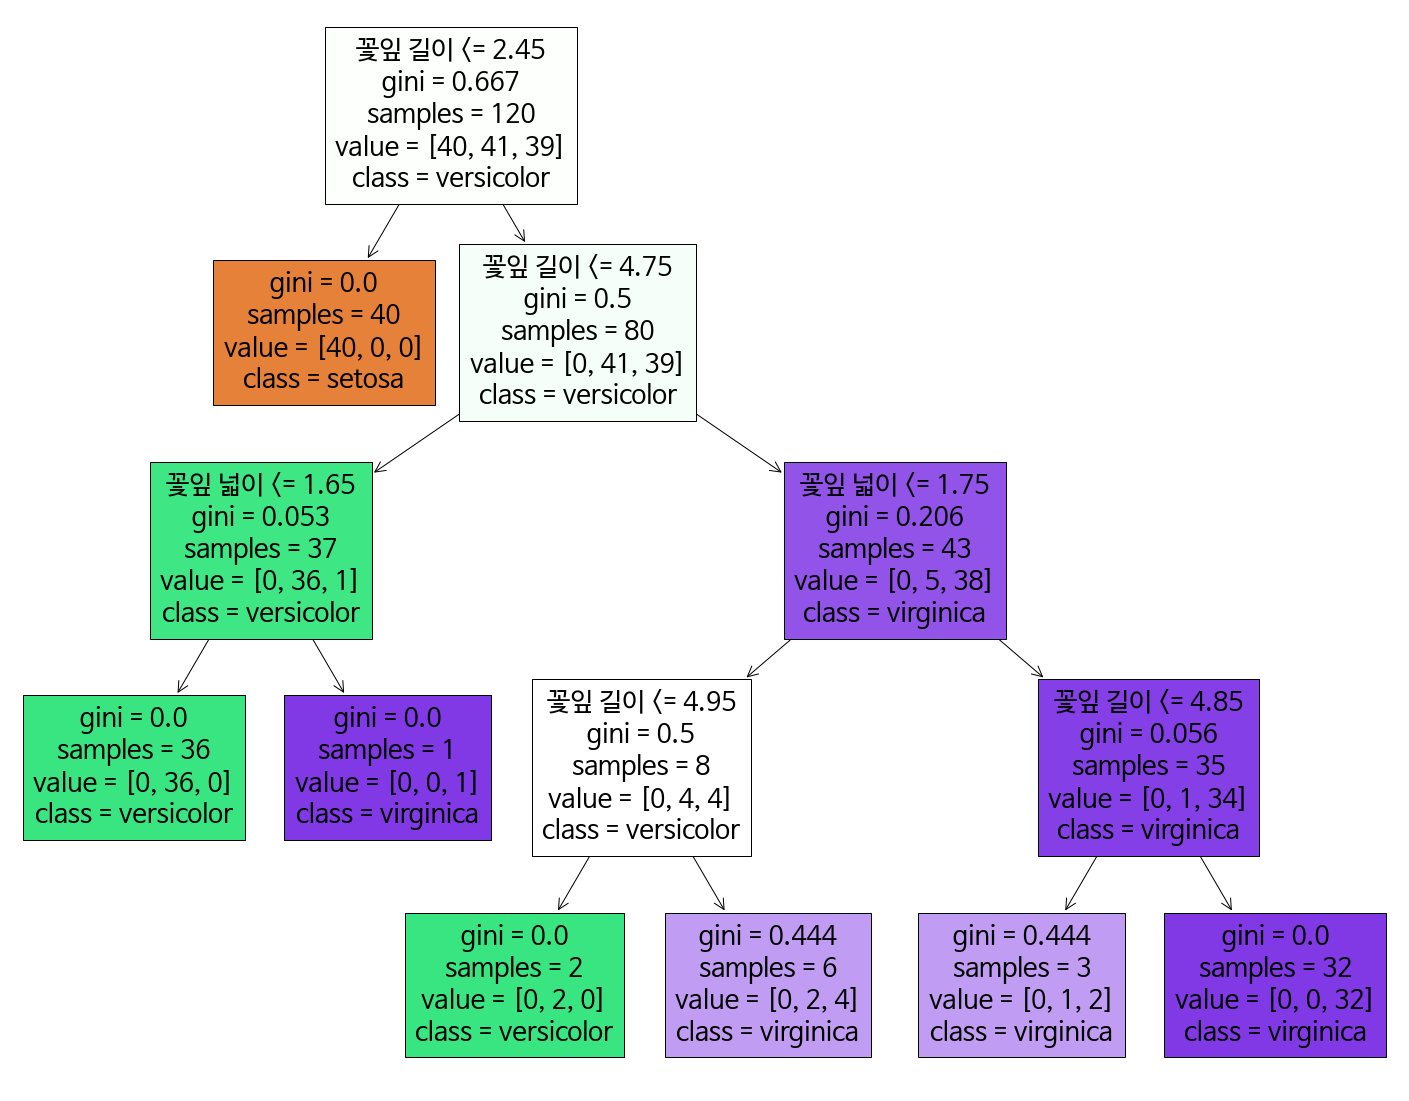

In [9]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 1. 의사결정나무 model 초기화 및 학습
dtmodel = DecisionTreeClassifier(max_depth=4)
dtmodel.fit(train_X, train_Y)

# 학습 결과 출력
plt.rc('font', family='NanumBarunGothic')
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtmodel, 
                   feature_names=['꽃받침 길이','꽃받침 넓이', '꽃잎 길이', '꽃잎 넓이'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)

#### 예측하기

In [11]:
pred_X = dtmodel.predict(test_X)
print('test_X에 대한 예측값: \n{}'.format(pred_X))

test_X에 대한 예측값: 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### 👩‍💻 예제 2

In [15]:
import pandas as pd

# 풍속을 threshold 값에 따라 분리하는 의사결정나무 모델 함수
def binary_tree(data, threshold):
    
    yes = []
    no = []
    
    # data로부터 풍속 값마다 비교를 하기 위한 반복문
    for wind in data['풍속']:
        
        # threshold 값과 비교하여 분리
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
            
    # 예측 결과 DataFrame 형태로 저장
    data_yes = pd.DataFrame({'풍속': yes, '예상 지연 여부': ['Yes']*len(yes)})
    data_no = pd.DataFrame({'풍속': no, '예상 지연 여부': ['No']*len(no)})
    
    return data_no.append(data_yes, ignore_index= True)

# 풍속에 따른 항공 지연 여부 데이터
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

# 위 데이터를 DataFrame 형태로 저장
data = pd.DataFrame({'풍속': Wind, '지연 여부': Delay})
display(data)

# 1. binary_tree 모델을 사용하여 항공 지연 여부 예측
data_pred = binary_tree(data, threshold=4)
display(data_pred)

,풍속,지연 여부
0,1.0,No
1,1.5,No
2,2.5,No
3,5.0,Yes
4,5.5,Yes
5,6.5,Yes


C:\Users\dltmf\AppData\Local\Temp\ipykernel_25648\1999953561.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return data_no.append(data_yes, ignore_index= True)


,풍속,예상 지연 여부
0,1.0,No
1,1.5,No
2,2.5,No
3,5.0,Yes
4,5.5,Yes
5,6.5,Yes


## 📌 03. 의사결정나무 - 불순도

## 📌 04. 분류 평가 지표

### 💡 혼동 행렬 (Confusion Matrix)
- 분류 모델의 성능을 평가하기 위함
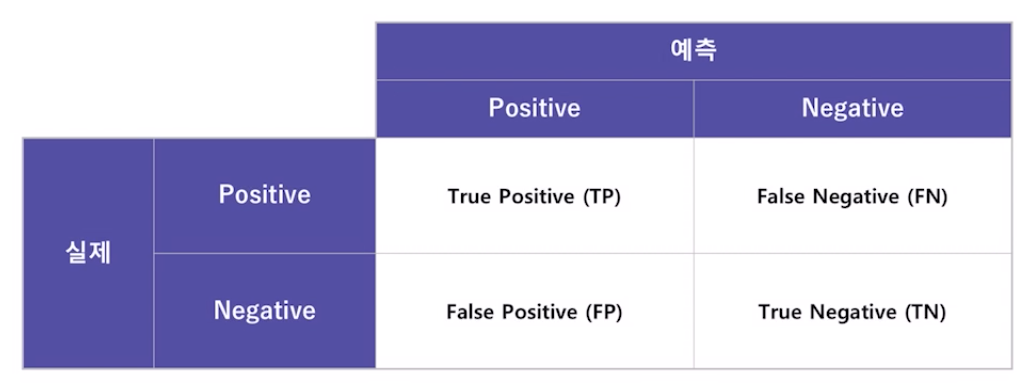


- **True Positive**: 실제 **Positive**인 값을 **Positive**라고 예측 (정답)
- **True Negative**: 실제 **Negative**인 값을 **Negative**라고 예측 (정답)


- **False Positive**: 실제 **Negative**인 값을 **Positive**라고 예측 (오답) 👉 ***1형 오류***
- **False Negative**: 실제 **Positive**인 값을 **Negative**라고 예측 (오답) 👉 ***2형 오류***
---
### 💡 정확도 (Accuracy)
- 전체 데이터 중에서 제대로 분류된 데이터의 비율로 **모델이 얼마나 정확하게 분류**하는지를 나타냄
- 일반적으로 분류 모델의 주요 평가 방법으로 사용
- 그러나, 클래스의 비율이 **불균형**할 경우 평가 지표의 신뢰성을 잃을 가능성이 있음
```
    Accuracy = (TP + TN)/ (P + N)
            P : TP + FN
            N : TN + FP
```
---
### 💡 정밀도 (Precision)
- 모델이 Positive라고 분류한 데이터 중에서 실제로 Positive인 데이터의 비율
- **Negative가 중요한 경우**
- 즉, 실제로 Negative인 데이터를 Positive라고 판단하면 안되는 경우 사용되는 지표
```
    Precision = TP / (TP + FP)
```

### 👀 Negative가 중요한 경우
- 스팸 메일 판결을 위한 분류 문제
    - 해당 메일이 스팸일 경우 👉 **Positive**
    - 스팸이 아닐 경우 즉, 일반 메일일 경우 👉 **Negative**
    
    - 일반 메일을 **스팸 메일(Positive)로 잘못 예측**했을 경우 중요한 메일을 전달받지 못하는 상황이 발생할 수 있음
---
### 💡 재현율 (Recall, TPR)
- 실제로 Positive인 데이터 중에서 모델이 Positive로 분류한 데이터의 비율
- **Positive가 중요한 경우**
- 즉, 실제로 Positive인 데이터를 Negative라고 판단하면 안되는 경우 사용되는 지표
```
    Recall = TP / (TP + FN) = TP / P
```

### 👀 Positive가 중요한 경우
- 악성 종양 여부 판결을 위한 검사
    - 악성 종양일 경우 👉 **Positive**
    - 악성 종양이 아닐 경우 즉, 양성 종양일 경우 👉 **Negative**
    
    - 악성 종양(Positive)을 **양성 종양(Negative)로 잘못 예측**했을 경우 제 때 치료를 받지 못하게 되어 생명이 위급해질 수 있음
---
### 💡 다양한 분류 지표의 활용
분류 목적에 따라 다양한 지표를 계산하여 평가
- 분류 결과를 전체적으로 보고 싶다면 👉 혼동 행렬(Confusion Matrix)
- 정답을 얼마나 잘 맞췄는지 👉 정확도(Accuracy)
- FP 또는 FN의 중요도가 높다면 👉 정밀도(Precision), 재현율(Recall)

### 👩‍💻 예제 3

#### 데이터 정보
유방암 유무 판별 데이터
- X(feature) : 30개의 환자 데이터
- Y(label) : 0 음성(악성), 1 양성(정상)

In [28]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Data Load
X, Y = load_breast_cancer(return_X_y = True)
X = np.array(X)
Y = np.array(Y)

# 데이터 정보 출력
print('전체 샘플 개수: ',len(X))
print('X의 feature 개수: ',len(X[0]))

전체 샘플 개수:  569
X의 feature 개수:  30


In [19]:
# 학습용/ 평가용 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=.2, random_state = 42)

# 분리된 평가용 데이터 정보 출력
print('평가용 샘플 개수: ',len(test_Y))
print('클래스 0인 평가용 샘플 개수: ',len(test_Y)-sum(test_Y))
print('클래스 1인 평가용 샘플 개수: ',sum(test_Y),'\n')

평가용 샘플 개수:  114
클래스 0인 평가용 샘플 개수:  43
클래스 1인 평가용 샘플 개수:  71 



#### 모델 학습 및 예측

In [20]:
# 모델 초기화 및 학습
dtmodel = DecisionTreeClassifier()
dtmodel.fit(train_X, train_Y)

# test_X 바탕으로 예측값 저장
pred_Y = dtmodel.predict(test_X)

#### 혼동 행렬 계산하기

Confusion Matrix : 
 [[39  4]
 [ 4 67]]


[Text(0.5, 1.0, 'Confusion Matrix'),
 Text(33.0, 0.5, 'True label'),
 Text(0.5, 24.0, 'Predicted label')]

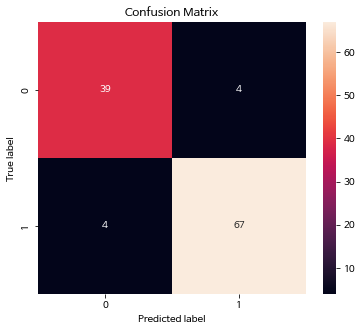

In [23]:
cm = confusion_matrix(test_Y, pred_Y)
print('Confusion Matrix : \n {}'.format(cm))

# 혼동 행렬을 출력합니다
fig = plt.figure(figsize=(6,5))
ax = sns.heatmap(cm, annot=True)
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')

#### 정확도(Accuracy) 계산하기

In [25]:
# 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = .2, random_state = 42)

# 분리된 데이터 정보 재출력
print('학습용 샘플 개수: ',len(train_Y))
print('클래스 0인 학습용 샘플 개수: ',len(train_Y)-sum(train_Y))
print('클래스 1인 학습용 샘플 개수: ',sum(train_Y),'\n')

print('평가용 샘플 개수: ',len(test_Y))
print('클래스 0인 평가용 샘플 개수: ',len(test_Y)-sum(test_Y))
print('클래스 1인 평가용 샘플 개수: ',sum(test_Y),'\n')

학습용 샘플 개수:  455
클래스 0인 학습용 샘플 개수:  169
클래스 1인 학습용 샘플 개수:  286 

평가용 샘플 개수:  114
클래스 0인 평가용 샘플 개수:  43
클래스 1인 평가용 샘플 개수:  71 



In [26]:
# 모델 학습
dtmodel = DecisionTreeClassifier()
dtmodel.fit(train_X, train_Y)

# 예측값 각각 저장
pred_train = dtmodel.predict(train_X)
pred_test  = dtmodel.predict(test_X)

# 혼동 행렬 계산
cm_train = confusion_matrix(train_Y, pred_train)
cm_test = confusion_matrix(test_Y, pred_test)

print('train_X Confusion Matrix : \n{}\n'.format(cm_train))
print('test_X Confusion Matrix : \n{}'.format(cm_test))

train_X Confusion Matrix : 
[[169   0]
 [  0 286]]

test_X Confusion Matrix : 
[[39  4]
 [ 3 68]]


In [27]:
# 정확도 계산
acc_train = dtmodel.score(train_X, train_Y)
acc_test = dtmodel.score(test_X, test_Y)

# 정확도 출력
print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))

train_X Accuracy: 1.000000
test_X Accuracy: 0.938596


In [30]:
# accuracy_score() 이용해보기
acc_train_ = accuracy_score(train_Y, pred_train)
acc_test_  = accuracy_score(test_Y, pred_test)

# 정확도 출력
print('train_X Accuracy: %f' % (acc_train_))
print('test_X Accuracy: %f' % (acc_test_))

train_X Accuracy: 1.000000
test_X Accuracy: 0.938596


#### 정밀도(Precision), 재현율(Recall) 계산하기

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 1. 정밀도 계산
precision_train = precision_score(train_Y, pred_train)
precision_test  = precision_score(test_Y, pred_test)

# 정밀도를 출력합니다.
print('train_X Precision: %f' % (precision_train))
print('test_X Precision: %f' % (precision_test),'\n')

# 2. 재현율 계산
recall_train = recall_score(train_Y, pred_train)
recall_test  = recall_score(test_Y, pred_test)

# 재현율을 출력합니다.
print('train_X Recall: %f' % (recall_train))
print('test_X Recall: %f' % (recall_test))

train_X Precision: 1.000000
test_X Precision: 0.944444 

train_X Recall: 1.000000
test_X Recall: 0.957746
